# ws 02 03

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [70]:
train_dir = 'train_set'
val_dir = 'validation_set'

test_dir = 'test_set'

target_img_shape=(64, 64) 

train_datagen = ImageDataGenerator(rescale = 1./255,  # 
        rotation_range=20,
        height_shift_range=0.15,
        width_shift_range=0.15, 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# train_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32, 
                                                 class_mode='binary') 

Found 1802 images belonging to 2 classes.


In [71]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='binary')

Found 200 images belonging to 2 classes.


In [72]:
print('Training')
ids, counts = np.unique(train_set.classes, return_counts=True)

print(ids)
print(counts)

Training
[0 1]
[901 901]


In [73]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels  

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

   cat = 901
   dog = 901


In [74]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)

print(ids)
print(counts)

Validation
[0 1]
[100 100]


In [75]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels   #  labels[2] = 'elephant'

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

   cat = 100
   dog = 100


In [76]:

_, train_count = np.unique(train_set.classes, return_counts=True)
_, val_count = np.unique(val_set.classes, return_counts=True)

print('Ratio Validation/Training set:', 
      val_count/(train_count+val_count) * 100)

Ratio Validation/Training set: [9.99000999 9.99000999]


In [77]:
train_set[0][0][0].shape

(64, 64, 3)

{'cat': 0, 'dog': 1}
(32, 64, 64, 3)
(32,)
class: 1.0


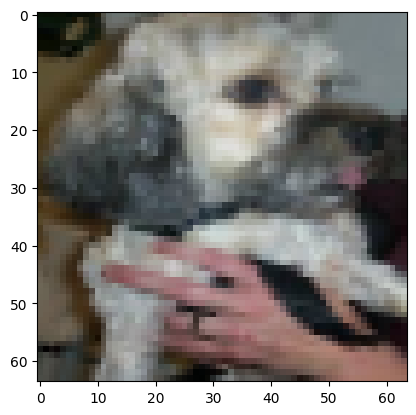

In [78]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    plt.imshow(image_batch[0])
    print('class:', labels_batch[0])
    
    break

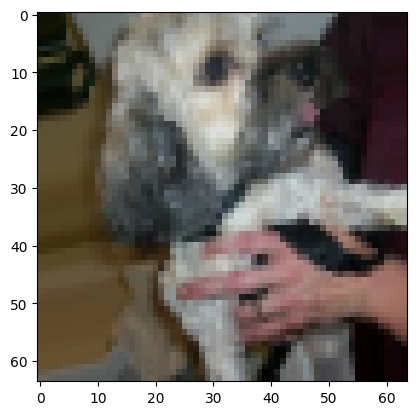

In [79]:
plt.imshow(train_set[0][0][0])
plt.show()

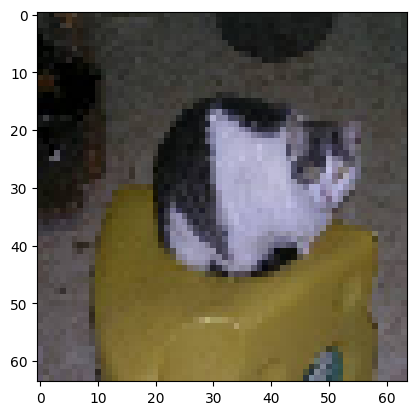

In [80]:
plt.imshow(val_set[0][0][0])
plt.show()

In [81]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(10,10))
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

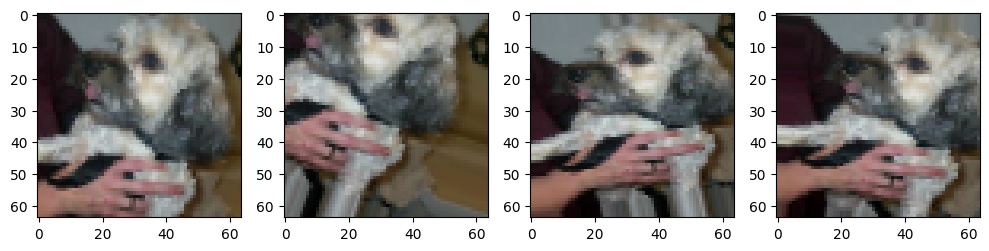

In [82]:
augmented_images = [train_set[0][0][0] for i in range(4)]
plotImages(augmented_images)

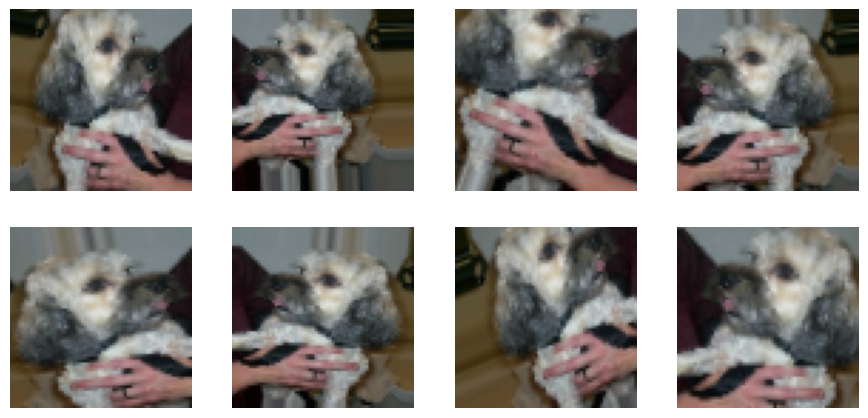

In [83]:
nplots = 8

def visual_multi(images_arr):
    fig = plt.figure(figsize=(11, 8)) 
    for j in range(nplots):

        plt.subplot(3, 4, j+1)
        plt.imshow(images_arr[j])

        plt.axis('off')

    plt.show()


augmented_images = [train_set[0][0][0] for i in range(nplots)]
visual_multi(augmented_images)

# Model

In [84]:
in_shape=(target_img_shape[0],target_img_shape[1],3)
in_shape

(64, 64, 3)

In [85]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, AveragePooling2D, 
Flatten, Dropout, MaxPool2D )

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPool2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))  # 
model.add(Dense(1, activation='sigmoid'))

In [86]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
import time
start = time.time()

history = model.fit(train_set, steps_per_epoch=len(train_set),
                     validation_data=val_set, 
                    epochs=40, verbose=1) 

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.5015 - loss: 0.6993 - val_accuracy: 0.5400 - val_loss: 0.6915
Epoch 2/40


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5400 - val_loss: 0.6915
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.5681 - loss: 0.6899 - val_accuracy: 0.5050 - val_loss: 0.6934
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5050 - val_loss: 0.6934
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.5694 - loss: 0.6781 - val_accuracy: 0.5700 - val_loss: 0.7038
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5700 - val_loss: 0.7038
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6058 - loss: 0.6580 - val_accuracy: 0.6100 - val_loss: 0.6662
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6100 - val_loss: 0.6662
Epoch 9/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6456 - loss: 0.6256 - val_acc

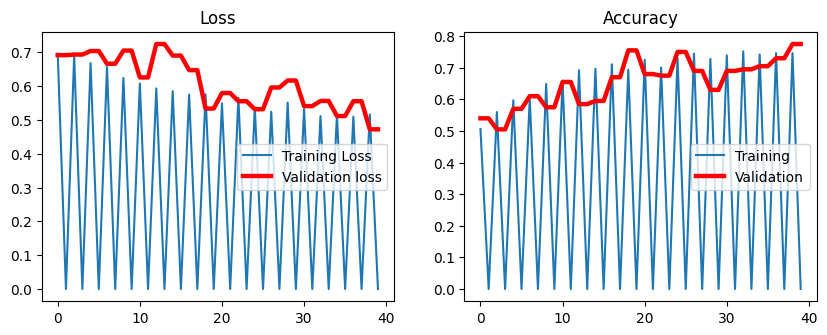

In [89]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

In [90]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=0)
print('score = {:.3f}' .format(acc[1]))

score = 0.775


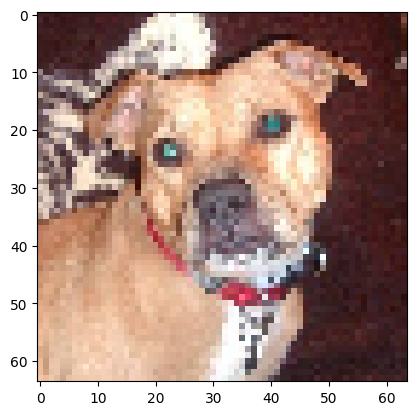

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape=(64, 64)

test_image = image.load_img('test_set/2.jpg', target_size=target_img_shape)  # PIL

test_image = image.img_to_array(test_image)
test_image /= 255.0

plt.tight_layout()
plt.imshow(test_image)
plt.show()

In [97]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

In [98]:
result = model.predict(test_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[0.9567403]], dtype=float32)

In [99]:
train_set.class_indices

{'cat': 0, 'dog': 1}

In [100]:
if result[0][0] > 0.5:
    predict='Dog'
else:
    predict='Cat'

print(predict)

Dog


In [101]:
cls = 'Dog' if result[0][0] > 0.5 else 'Cat'
cls

'Dog'

In [102]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_dog_cat(lst):
    y_pred = [] ; y_pred_cls = []; img_lst = []
    for i in lst:
        
        img = load_img(i, target_size=target_img_shape)
        img = img_to_array(img)
        img /= 255.0
      
        
        img_lst.append(img)

        img = np.expand_dims(img, axis=0)
        
        y_pred_i = model.predict(img)
        y_pred_cls_i = 'Dog' if y_pred_i > 0.5 else 'Cat'  # 
#         if y_pred_i[0] > 0.5:
#             y_pred_cls_i = 'Dog'
#         else:
#             y_pred_cls_i = 'Cat'
            
        y_pred.append(y_pred_i)
        y_pred_cls.append(y_pred_cls_i)

    return img_lst, y_pred_cls, y_pred

In [106]:
import glob
import os

mylist = [f for f in glob.glob('./test_set/*')]

img_lst,y_pred_cls,y_pred = predict_dog_cat(mylist) 

mylist
for i in mylist:
    print(os.path.basename(i), end=' | ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

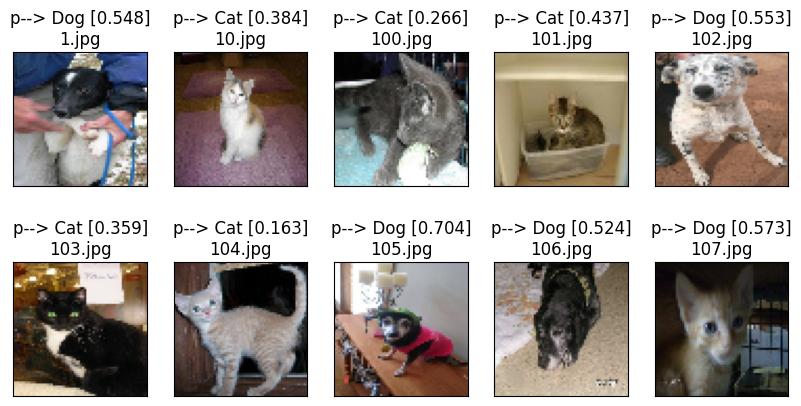

In [107]:
nplots = 10
fig = plt.figure(figsize=(10, 5)) 

for i, k in enumerate(img_lst):

    plt.subplot(nplots//5, 5, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {} {}'.format(y_pred_cls[i],y_pred[i][0].round(3)))
    
    fname = os.path.basename(mylist[i])
    plt.title('p--> {} {}\n{}'.format(y_pred_cls[i],y_pred[i][0].round(3), fname))

    plt.xticks([])
    plt.yticks([])

    if i >= nplots-1:  # 
        break

plt.show()

WS 03

In [108]:
train_dir = 'train_set'
target_img_shape=(64, 64)

In [115]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, height_shift_range=0.15, width_shift_range=0.15, shear_range=0.9, 
                                   zoom_range=0.2, horizontal_flip=True,fill_mode='nearest')

train_set = train_datagen.flow_from_directory(train_dir, target_size=target_img_shape, batch_size=32, class_mode='binary')

Found 1802 images belonging to 2 classes.


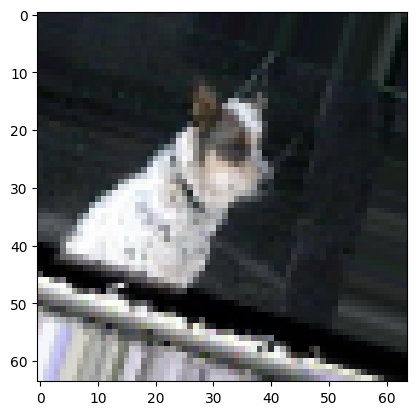

In [116]:
plt.imshow(train_set[0][0][0])
plt.show()

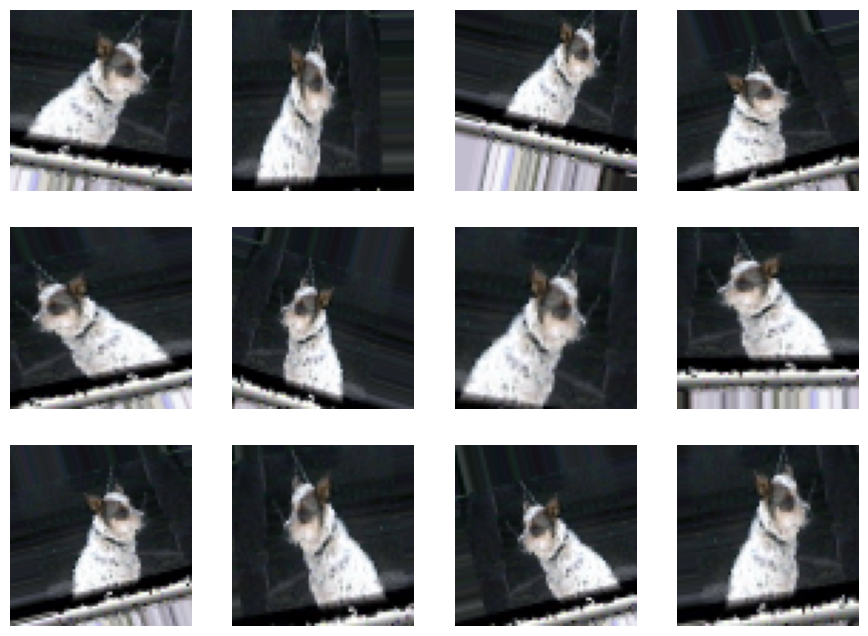

In [119]:
nplots = 12

def visual_multi(images_arr):
    fig = plt.figure(figsize=(11,8))
    for j in range(nplots):
        plt.subplot(3,4,j+1)
        plt.imshow(images_arr[j])
        plt.axis('off')
    plt.show()

augmented_images = [train_set[0][0][0] for i in range(nplots)]
visual_multi(augmented_images)